In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [3]:
df = pd.read_csv("PBL5recommendationdata.csv",encoding='iso-8859-1')

In [4]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [5]:
df.shape

(4194, 181)

In [7]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [8]:
df.columns.to_list()

['Customers.id',
 'Customers.fname',
 'Customers.lname',
 'Customers.company',
 'Customers.create_date',
 'Customers.status',
 'Customers.mailing',
 'Customers.reminders',
 'Customers.tax_exempt',
 'Customers.account_id',
 'Customers.sales_rep',
 'Customers.rewards',
 'Customers.profile_id',
 'Customers.last_modified',
 'Customers.customer_type',
 'Orders.id',
 'Orders.customer_id',
 'Orders.fname',
 'Orders.lname',
 'Orders.company',
 'Orders.order_number',
 'Orders.reorder_id',
 'Orders.external_source',
 'Orders.external_id',
 'Orders.currency',
 'Orders.sales_rep',
 'Orders.subtotal',
 'Orders.tax',
 'Orders.shipping',
 'Orders.coupon_id',
 'Orders.coupon_amount',
 'Orders.gift_id',
 'Orders.gift_amount',
 'Orders.fee_name',
 'Orders.fee_amount',
 'Orders.discount_name',
 'Orders.discount_amount',
 'Orders.total',
 'Orders.balance_due',
 'Orders.shipping_carrier',
 'Orders.shipping_method',
 'Orders.shipping_trans',
 'Orders.shipping_flags',
 'Orders.weight',
 'Orders.tracking',
 '

In [10]:
df = df[df['Orders.subtotal']>0]

In [11]:
df = df[df['Order_Items.qty']>0]

In [12]:
total_data=pd.DataFrame(df.isnull().sum()) 

In [13]:
total_data

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.company,3467
Customers.create_date,0
...,...
Products.leg_style,4194
Products.seat_size,4032
Products.family_id,325
Products.saved_status,264


In [16]:
less_data_table = total_data[total_data[0]>1000]

In [17]:
total_data[0]

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Name: 0, Length: 181, dtype: int64

In [18]:
less_data_table

,0
Customers.company,3467
Customers.status,4093
Customers.mailing,2080
Customers.reminders,4194
Customers.tax_exempt,4189
...,...
Products.material,3392
Products.arm_style,4039
Products.leg_style,4194
Products.seat_size,4032


In [21]:
df.shape

(4194, 67)

In [22]:
for i in df.select_dtypes(include=np.object):
    df[i].fillna(df[i].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [23]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].mean(),inplace=True)

In [24]:
df.isnull().sum()

Customers.id                     0
Customers.fname                  0
Customers.lname                  0
Customers.create_date            0
Customers.last_modified          0
Customers.customer_type          0
Orders.id                        0
Orders.customer_id               0
Orders.fname                     0
Orders.lname                     0
Orders.order_number              0
Orders.currency                  0
Orders.subtotal                  0
Orders.tax                       0
Orders.shipping                  0
Orders.total                     0
Orders.shipping_carrier          0
Orders.shipping_method           0
Orders.tracking                  0
Orders.payment_status            0
Orders.payment_date              0
Orders.payment_type              0
Orders.payment_amount            0
Orders.payment_id                0
Orders.payment_code              0
Orders.status                    0
Orders.placed_date               0
Orders.updated_date              0
Orders.shipped_date 

In [25]:
df2 = pd.get_dummies(df,drop_first=True)

In [26]:
df2

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_flags,Products.qb_edit_sequence,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,Customers.fname_A.J.,Customers.fname_ACCOUNTS,Customers.fname_AKOSSIWA,Customers.fname_ALEEN,Customers.fname_ALFRED,Customers.fname_ALICE,Customers.fname_ALVIN,Customers.fname_ANDREA,Customers.fname_ANDREW,Customers.fname_ANDY R,Customers.fname_ANGELA,Customers.fname_ANITA,...,Products.family_id_WA32,Products.family_id_WA35,Products.family_id_WA37,Products.family_id_WA38,Products.family_id_WA40,Products.family_id_WA42,Products.family_id_WA43,Products.family_id_WC12,Products.family_id_WC13,Products.family_id_WC14,Products.family_id_WC17,Products.family_id_WC2,Products.family_id_WC22,Products.family_id_WC23,Products.family_id_WC24,Products.family_id_WC26,Products.family_id_WC27,Products.family_id_WC38,Products.family_id_WC39,Products.family_id_WC4,Products.family_id_WC40,Products.family_id_WC46,Products.family_id_WC49,Products.family_id_WC50,Products.family_id_WC6,Products.family_id_WZ1,Products.family_id_WZ28,Products.family_id_WZ31,Products.family_id_WZ43,Products.family_id_WZ56,Products.family_id_WZ58,Products.family_id_WZ70,Products.family_id_WZ71,Products.family_id_WZ72,Products.family_id_WZ73,Products.family_id_WZ74,Products.family_id_WZ76,Products.family_id_WZ77,Products.family_id_WZ81,Products.family_id_WZ85,Products.family_id_WZ86,Products.family_id_WZ87,Products.family_id_WZ88,Products.family_id_WZ89,Products.family_id_WZ91,Products.family_id_WZ92,Products.family_id_WZ96,Products.family_id_Wall mat hanger,Products.family_id_the Adjustable CuffÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Variable Weights,Products.family_id_the CuffÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Weights
0,797,1426018724,1437764306,0.000000,3758,797,57.20,0.000000,9.950000,64.29,3.0,1.426019e+09,64.29,1,1426019099,1.438868e+09,1.426101e+09,0.000000,5284,3758,2310.0,1,57.20,44.00,2310.0,0.0,1.0,3.0,80.70,57.64,44.00,1.463163e+09,62.0,1.450325e+09,24.80,7.50,30.40,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1386089139,1437764354,0.000000,23,3,20.00,0.800838,9.990000,29.99,3.0,1.386090e+09,29.99,1,1386090455,1.440529e+09,1.386103e+09,0.000000,31,23,177.0,4,5.00,1.87,177.0,1.0,1.0,3.0,14.41,10.29,1.87,1.462370e+09,62.0,1.450322e+09,8.00,7.00,1.50,0.876336,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1386089139,1437764354,0.000000,9531,3,68.78,0.000000,9.950000,78.73,3.0,1.449604e+09,78.73,3,1449603652,1.450213e+09,1.442167e+09,0.000000,11655,9531,1.0,1,68.78,52.50,1.0,0.0,1.0,3.0,96.29,68.78,52.50,1.463163e+09,62.0,1.450321e+09,13.23,10.04,10.24,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1386780263,1437762646,0.000000,29,4,19.56,0.000000,9.950000,29.55,3.0,1.386780e+09,29.55,1,1386780263,1.440529e+09,1.386800e+09,0.000000,1816,29,983.0,1,19.56,12.62,983.0,0.0,1.0,3.0,27.38,19.56,12.62,1.462595e+09,62.0,1.450323e+09,10.60,7.80,18.50,0.876336,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1386861599,1437764316,0.000000,30,5,36.05,0.800838,9.950000,46.00,3.0,1.386862e+09,46.00,1,1386861599,1.440529e+09,1.386876e+09,0.000000,40,30,991

In [27]:
all_score=[]
all_clusters=[]
sum_of_squared_distances=[]
predicts=[]
def cluster(clusters,df2):
    for i in np.arange(2,clusters):
        K=KMeans(n_clusters=i)
        K.fit(df2)
        predict_kmeans=K.predict(df2)
        score=silhouette_score(df2,predict_kmeans)
        all_score.append(score)
        all_clusters.append(i)
        sum_of_squared_distances.append(K.inertia_)
        predicts.append(predict_kmeans)
        print(f"cluster={i}, score={score}") 

In [29]:
cluster(10,df2)

cluster=2, score=0.6285252292108295
cluster=3, score=0.5633175005611774
cluster=4, score=0.4929584689829877
cluster=5, score=0.48384390448359377
cluster=6, score=0.5024961968628144
cluster=7, score=0.46197503479376467
cluster=8, score=0.5078981002363663
cluster=9, score=0.5006751435704576


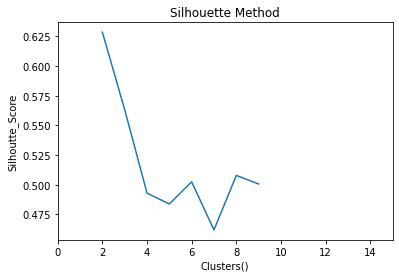

In [30]:
plt.plot(all_clusters,all_score)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

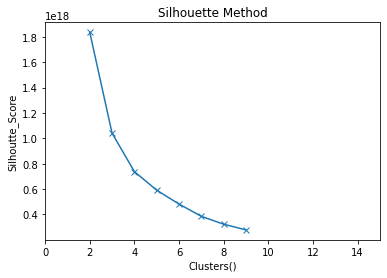

In [31]:
plt.plot(all_clusters,sum_of_squared_distances,marker='x')
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

In [32]:
pred=predicts[4]

In [33]:
result=pd.DataFrame()
result["Customers.id"]=df["Customers.id"]
result["Customer"]=df["Customers.fname"]+" "+df["Customers.lname"]
result["Cluster"]=pred

In [34]:
result

,Customers.id,Customer,Cluster
0,797,Christy Dill,2
1,3,John Smith,4
2,3,John Smith,0
3,4,James Anderson,4
4,5,Abraham Pollak,4
...,...,...,...
4189,3730,Nora Fontana,1
4190,3732,Kennithe Tecora,1
4191,3733,Tinna Randall,1
4192,3735,HALIMAH SHAHID,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


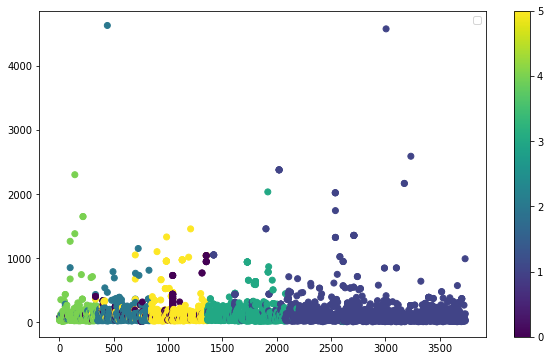

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(y=df2["Orders.total"],x=df2["Customers.id"],c=pred)
plt.legend()
plt.colorbar()
plt.show()